In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

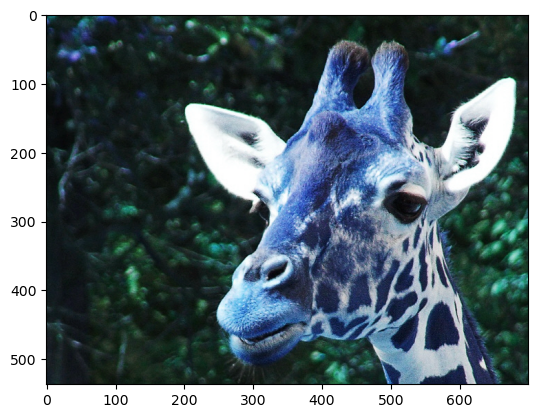

In [4]:
img= cv2.imread(r"C:\Users\varsha\Pictures\CV_IMG\giraffe.jpg")
plt.imshow(img)

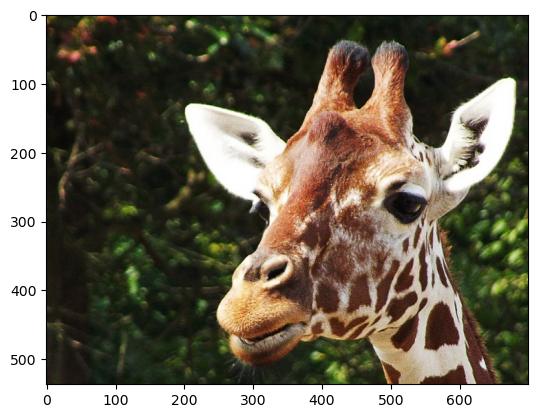

In [5]:
# convert BGR to RGB
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

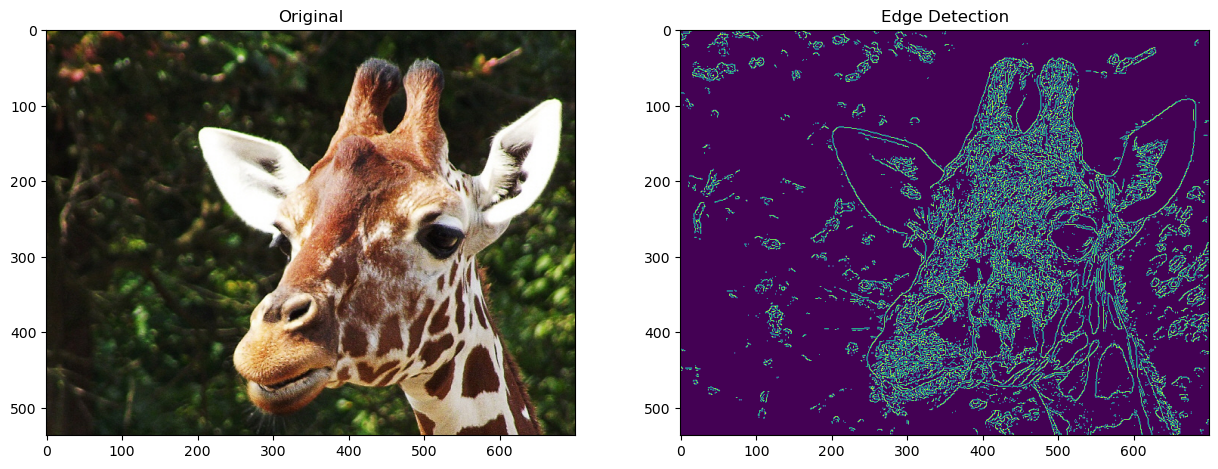

In [12]:
# Canny detection without blurring

edges= cv2.Canny(image= img, threshold1= 127, threshold2= 127)

plt.figure(figsize= (15,15))
plt.subplot(1,2,1);
plt.title('Original')
plt.imshow(img)
plt.subplot(1,2,2);
plt.title('Edge Detection')
plt.imshow(edges)

I just used the median value for the two thresholds without blurring and the result isn’t quite desirable.

In [13]:
#Set lower and upper threshold

med_val= np.median(img)

upper_thresh= int(min(255, 1.3*med_val))
lower_thresh= int(max(0, .7*med_val))

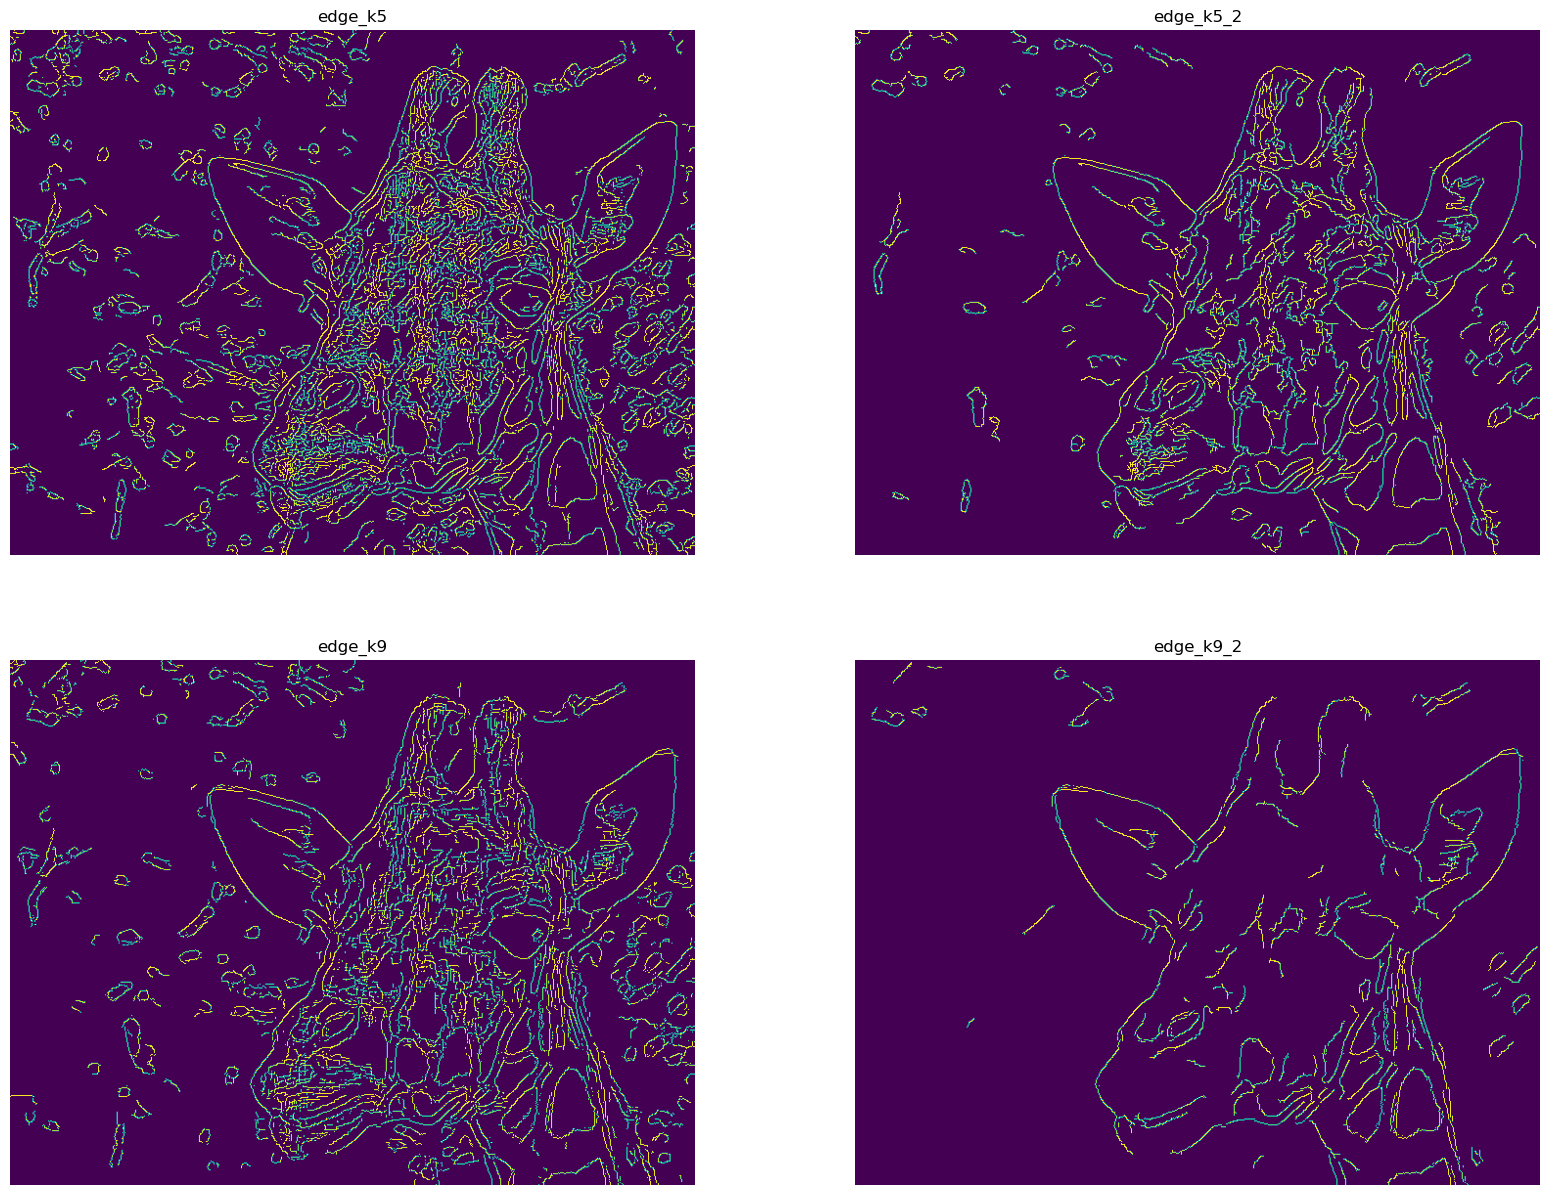

In [15]:
# Blurring with ksize= 5

img_k5= cv2.blur(img, ksize=(5,5))

#Canny detection with different kernel size
edge_k5= cv2.Canny(img_k5, threshold1= lower_thresh, threshold2= upper_thresh)
edge_k5_2= cv2.Canny(img_k5, threshold1= lower_thresh, threshold2= upper_thresh+100)

#Blurring with ksize=9
img_k9= cv2.blur(img, ksize=(9,9))

#Canny detection
edge_k9= cv2.Canny(img_k9, lower_thresh, upper_thresh)
edge_k9_2= cv2.Canny(img_k9, lower_thresh, upper_thresh+100)

# Plot the images
images = [edge_k5, edge_k5_2, edge_k9, edge_k9_2]
img_name= ['edge_k5', 'edge_k5_2', 'edge_k9', 'edge_k9_2']
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(img_name[i])
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

## Corner Detection

A corner as a junction where edges intersect. 

There are two types of Corner detection:
Harris corner detection and Shi & Tomasi corner detection.

These algorithms work as follows. We detect points where there’s a considerable change in their intensity values in all directions. And then we construct a matrix to extract eigenvalues from it. These eigenvalues are for the sake of scoring points to decide if it’s a corner or not.

### Harris corner detection

In [31]:
desk_img= cv2.imread(r"C:\Users\varsha\Pictures\CV_IMG\desk.jpg")
desk_img= cv2.cvtColor(desk_img, cv2.COLOR_BGR2RGB)
desk_img_gray= cv2.cvtColor(desk_img, cv2.COLOR_RGB2GRAY)

#Apply Harris corner detection
dst= cv2.cornerHarris(desk_img_gray, blockSize=5, ksize= 7, k= .04)

(-0.5, 1049.5, 699.5, -0.5)

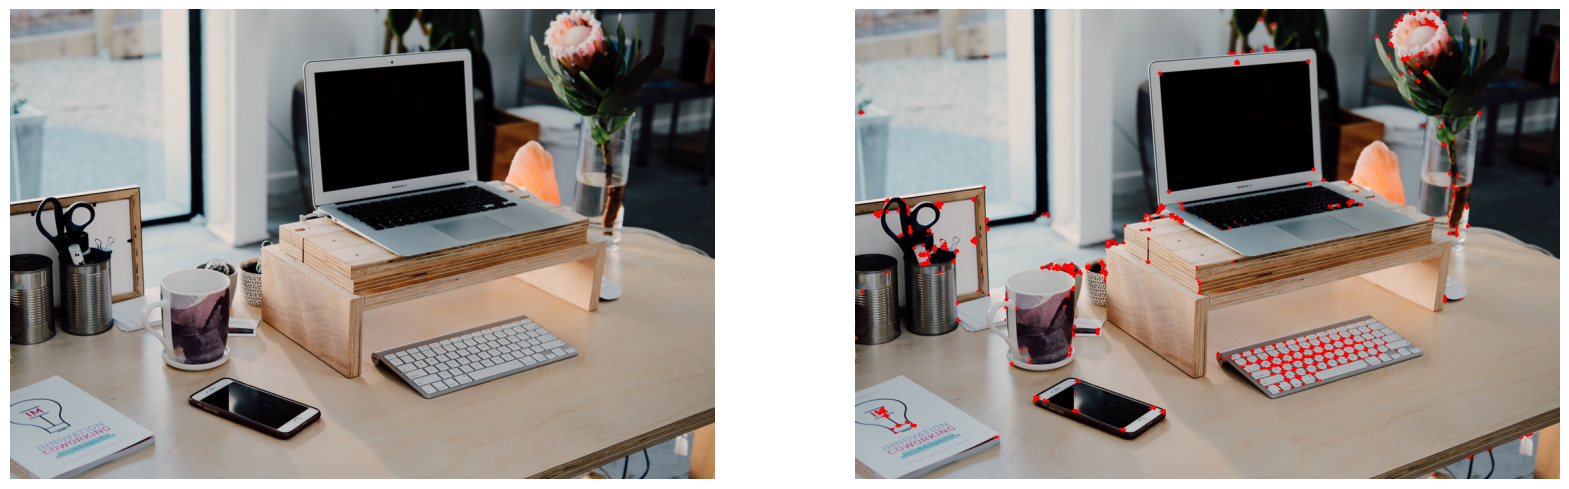

In [32]:
#Spot  the detected corner
img2= desk_img.copy()
img2[dst>0.01*dst.max()]= [255,0,0]

#Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(desk_img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img2)
plt.axis('off')

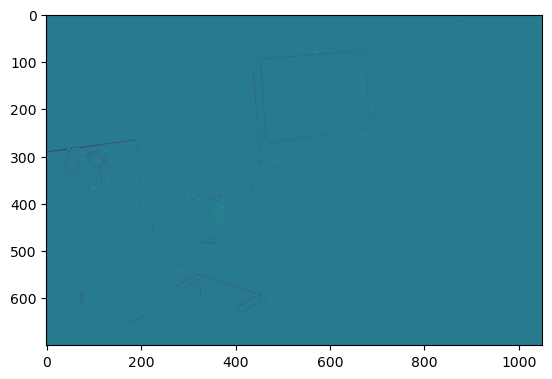

In [20]:
plt.imshow(dst)

### Shi-Tomasi corner detection

C:\Users\varsha\AppData\Local\Temp\ipykernel_20636\3366269593.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)# Spot the detected corners


(-0.5, 1049.5, 699.5, -0.5)

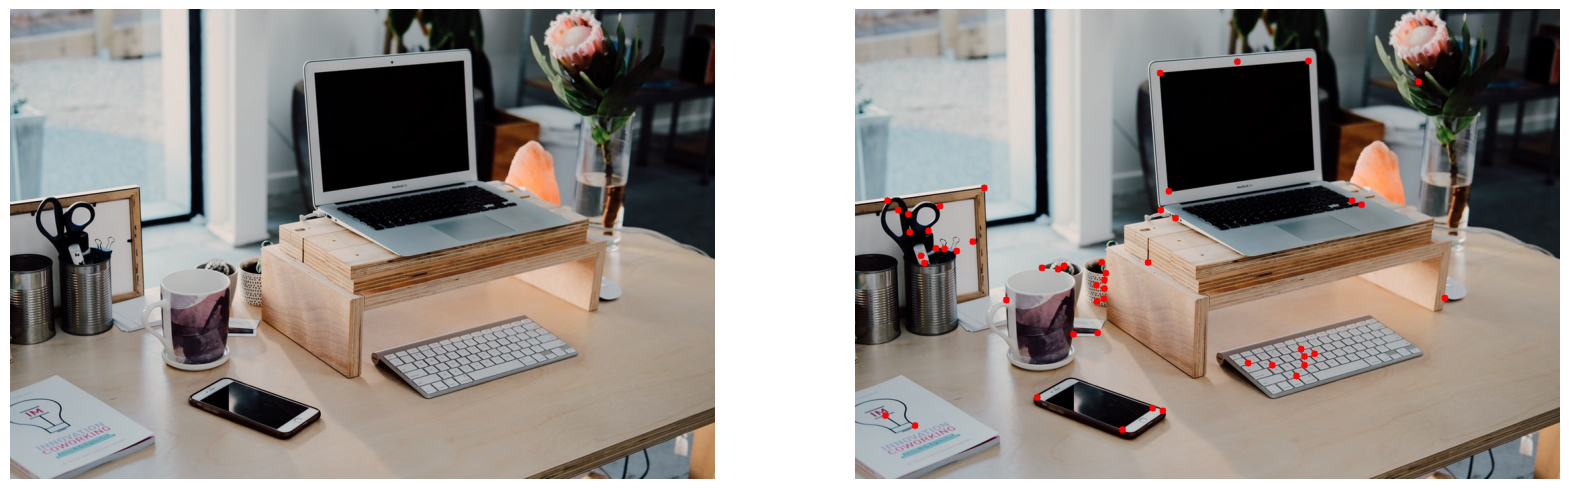

In [37]:
# Apply Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(desk_img_gray, maxCorners = 50, 
                                  qualityLevel = 0.01, 
                                  minDistance = 10)
corners = np.int0(corners)# Spot the detected corners
img_2 = desk_img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_2, center = (x, y), 
               radius = 5, color = 255, thickness = -1)# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(desk_img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

### Face Detection

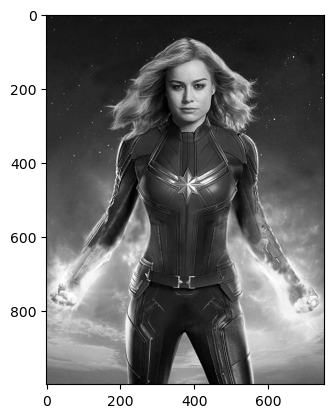

In [45]:
cap_mav= cv2.imread(r"C:\Users\varsha\Pictures\CV_IMG\captin_marvel.jpg")

#Find region of intrest
roi= cap_mav[50:350, 200:550]
roi= cv2.cvtColor(cap_mav, cv2.COLOR_BGR2GRAY)
                  
plt.imshow(roi, cmap = 'gray')                  

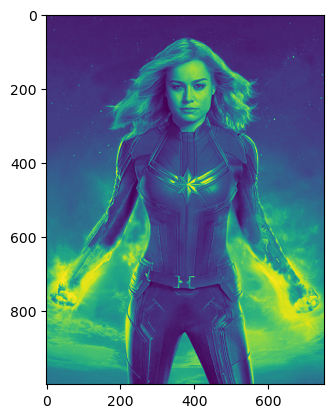

In [44]:
plt.imshow(roi)

(-0.5, 749.5, 999.5, -0.5)

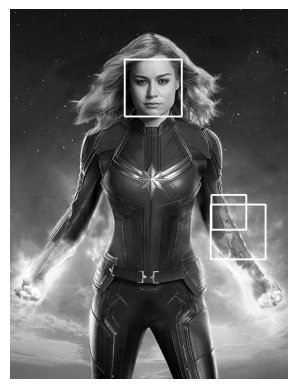

In [47]:
#load Cascade filter
face_cascade= cv2.CascadeClassifier(r"C:\Users\varsha\Pictures\CV_IMG\haarcascade_frontalface_default.xml")

# Create a face detection function
def detect_face(img):
    
    img2= img.copy()
    face_rect= face_cascade.detectMultiScale(img2, scaleFactor= 1.1, minNeighbors= 3)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(img2, (x,y), (x+w, y+h),(255,255,255), 3)
        
    return img2

#detect face

detect_roi= detect_face(roi)
plt.imshow(detect_roi, cmap = 'gray')
plt.axis('off')
    